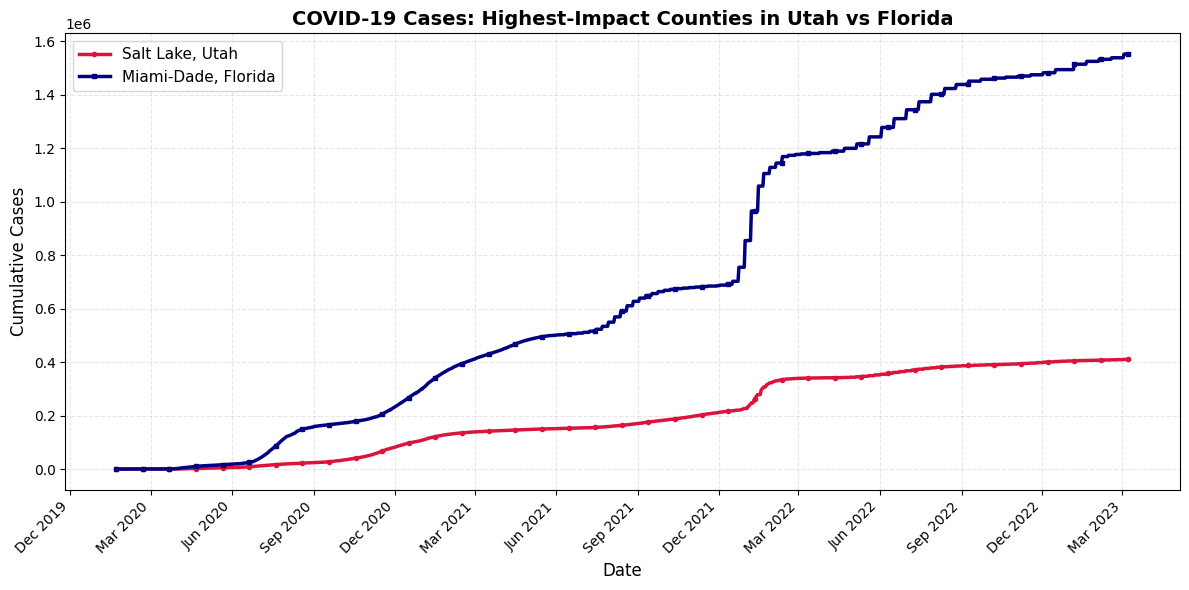

In [2]:
# Visualization 2: Utah vs Florida County Comparison

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load data from Downloads
covid_df = pd.read_csv('/Users/u1024341/Downloads/covid_data.csv')

# Visualization 2: Compare highest-case counties - Get date columns
date_columns = [col for col in covid_df.columns if '/' in col]
dates = pd.to_datetime(date_columns, format='%m/%d/%y')

# Find Utah county with most cases
utah_data = covid_df[covid_df['Province_State'] == 'Utah'].copy()
utah_data['total_cases'] = utah_data[date_columns[-1]]
utah_max_idx = utah_data['total_cases'].idxmax()
utah_top_county = utah_data.loc[utah_max_idx]

# Find Florida county with most cases
florida_data = covid_df[covid_df['Province_State'] == 'Florida'].copy()
florida_data['total_cases'] = florida_data[date_columns[-1]]
florida_max_idx = florida_data['total_cases'].idxmax()
florida_top_county = florida_data.loc[florida_max_idx]

# Create comparison plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Utah county
utah_cases = utah_top_county[date_columns].values
ax.plot(dates, utah_cases, color='crimson', linewidth=2.5, 
        label=f"{utah_top_county['Admin2']}, Utah", marker='o', markersize=3, markevery=30)

# Plot Florida county
florida_cases = florida_top_county[date_columns].values
ax.plot(dates, florida_cases, color='navy', linewidth=2.5, 
        label=f"{florida_top_county['Admin2']}, Florida", marker='s', markersize=3, markevery=30)

# Format plot
ax.set_title('COVID-19 Cases: Highest-Impact Counties in Utah vs Florida', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Cases', fontsize=12)
ax.legend(loc='upper left', fontsize=11)

# Format dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45, ha='right')

# Add grid
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()